# Monitor progress of geometry optimisation

In [1]:
import pymolpro
acrolein=pymolpro.Project("acrolein")
acrolein.import_file("monitor_geometry_optimisation/acrolein.xyz")
method="basis,cc-pVDZ;df-hf;df-mp2"
acrolein.write_input(f"""
geometry=acrolein.xyz
{method}
optg
put,xyz,opt.xyz
""" )
acrolein.run(force=True)

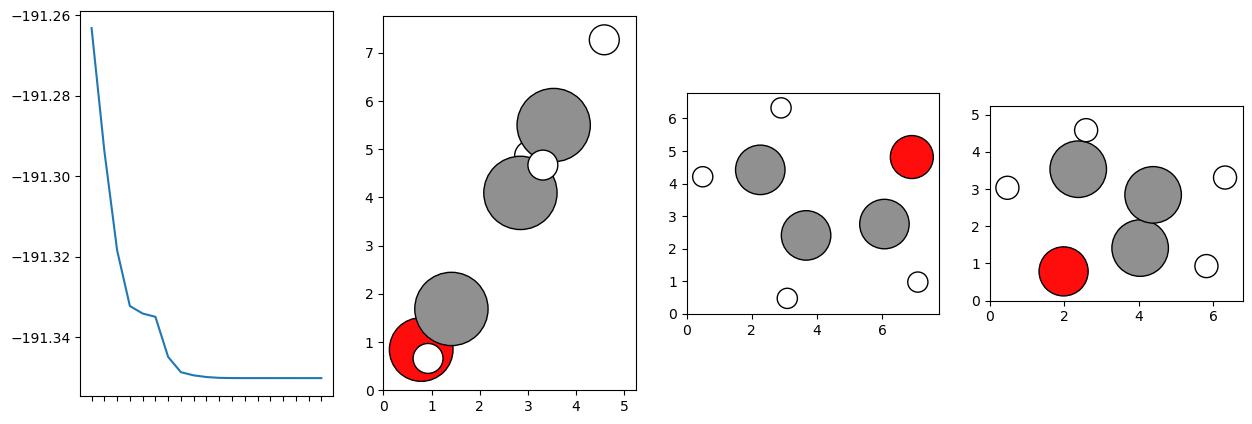

In [2]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import ase
from ase.visualize.plot import plot_atoms
oldenergies=[]
while acrolein.status != 'completed' and acrolein.status != 'killed' and acrolein.status != 'running': time.sleep(1)
time.sleep(0.3)
while True:
    energies = acrolein.energies(preamble='//jobstep[@command="OPTG"]//',method="MP2")
    if energies != oldenergies:
        oldenergies = energies
        clear_output(wait=True)
        with open("acrolein_current.xyz","w") as file:
            file.write(acrolein.xyz())
        fig, ax = plt.subplots(1,4, figsize=(15,5))
        atoms = ase.io.read("acrolein_current.xyz")
        plot_atoms(atoms, ax[1])
        plot_atoms(atoms,ax[2], rotation='90z,90x')
        plot_atoms(atoms,ax[3], rotation='90x,90z')
        ax[0].plot(energies)
        plt.sca(ax[0])
        plt.xticks(range(len(energies)),[])
        plt.show()
    if acrolein.status == 'completed' or acrolein.status == 'killed': break
    time.sleep(1)

In [3]:
import ase
from ase.visualize import view
with open("acrolein_current.xyz","w") as file:
    file.write(acrolein.xyz())
view(ase.io.read("acrolein_current.xyz"),viewer='x3d')